<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da18_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSON

* JSON(JavaScript Object Notations): 자바스크립트 객체 표현법
* `{key1: value1, key2: value2, ...}` 형식의 문자열
* Python의 `dict` 클래스 객체의 문자열 표현과 비슷
* `json` 모듈: **JSON** 형식 **문자열(str)** <---> **`dict`** 타입 **객체(object)**
    * `json.dumps(obj)`: Python 객체 obj를 JSON 형식의 문자열로 변환(serialize, 직렬화)해서 변환된 문자열을 리턴.
    * `json.loads(s)`: JSON 형식의 문자열 s를 Python 객체로 변환(deserialize, 역직렬화)해서 변환된 파이썬 객체를 리턴.
    * `json.dump(obj, fp)`: Python 객체 obj를 JSON 형식의 문자열로 변환해서 파일fp에 씀(write).
    * `json.load(fp)`: 파일 fp에서 JSON 형식의 문자열을 읽어서 Python 객체로 변환해서, 변환된 객체를 리턴.


In [1]:
import json  # JSON 읽기/쓰기 기능을 가지고 있는 파이썬 기본 모듈
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# json.dumps(obj): Python object ---> JSON formatted string (Serialize, 직렬화)
person = {'name': '홍길동', 
          'age': 16,
          'phones': ['02-1111-2222', '010-3333-4444']}

In [3]:
person

{'age': 16, 'name': '홍길동', 'phones': ['02-1111-2222', '010-3333-4444']}

In [4]:
type(person)  # person은 파이썬 dict 클래스 타입의 객체

dict

In [5]:
person_json = json.dumps(person)
person_json

'{"name": "\\ud64d\\uae38\\ub3d9", "age": 16, "phones": ["02-1111-2222", "010-3333-4444"]}'

In [8]:
type(person_json)  # json_dumps의 리턴 타입은 str

str

In [6]:
# json.loads(s): JSON formatted string ---> Python object (Deserialize, 역직렬화)
result = json.loads(person_json)
result

{'age': 16, 'name': '홍길동', 'phones': ['02-1111-2222', '010-3333-4444']}

In [7]:
type(result)

dict

## JSON 쓰기/읽기

In [9]:
with open('gildong.json', mode='w') as f:  # 파일을 텍스트 쓰기(wt) 모드로 오픈
    f.write(person_json)  # 문자열을 파일에 씀
# with ~ as 구문 종료 후 f.close() 자동 호출됨.

In [11]:
with open('gildong.json', mode='r') as f:  # 파일을 텍스트 읽기(rt) 모드로 오픈
    line = f.readline()  # 파일에서 첫번째 줄을 읽음
    print(line)  # 파일에서 읽은 JSON 포맷의 문자열
    gildong = json.loads(line)  # str ---> dict : deserialize
    print(type(gildong))
    print(gildong)

{"name": "\ud64d\uae38\ub3d9", "age": 16, "phones": ["02-1111-2222", "010-3333-4444"]}
<class 'dict'>
{'name': '홍길동', 'age': 16, 'phones': ['02-1111-2222', '010-3333-4444']}


In [13]:
# JSON 포맷의 문자열이 한줄씩 저장된 파일
with open('movies.json', mode='w') as f:
    # dict 객체 생성
    movie1 = {'mid': 1, 'title': '모가디슈', 'genre': 'action'}
    movie2 = {'mid': 2, 'title': 'black widow'}
    movie3 = {'mid': 3, 'title': '씽크홀', 'genre': 'comedy'}
    # dict ---> JSON formatted string
    m1_s = json.dumps(movie1)
    m2_s = json.dumps(movie2)
    m3_s = json.dumps(movie3)
    # 3개의 문자열을 한줄씩 파일에 write
    f.write(m1_s + '\n')  # '\n': new line(줄바꿈)
    f.write(m2_s + '\n')
    f.write(m3_s + '\n')

In [16]:
# 파일에서 한줄씩 읽으면서 dict객체로 변환하고 리스트에 추가
movies = []  # 한줄씩 읽고 변환한 객체를 저장할 리스트
with open('movies.json', mode='r') as f:  # 파일을 텍스트 읽기(rt) 모드로 open
    for line in f:  # 파일에서 한줄씩 읽으면서 반복
        # print(line)
        m = json.loads(line.strip())  # json formatted string ---> dict
        movies.append(m)  # dict 객체를 리스트에 추가

movies  #> dict 객체를 아이템으로 갖는 리스트

[{'genre': 'action', 'mid': 1, 'title': '모가디슈'},
 {'mid': 2, 'title': 'black widow'},
 {'genre': 'comedy', 'mid': 3, 'title': '씽크홀'}]

In [17]:
# list comprehension
with open('movies.json', mode='r') as f:
    movies_2 = [json.loads(s.strip()) for s in f]
movies_2

[{'genre': 'action', 'mid': 1, 'title': '모가디슈'},
 {'mid': 2, 'title': 'black widow'},
 {'genre': 'comedy', 'mid': 3, 'title': '씽크홀'}]

In [18]:
movies_df = pd.DataFrame(movies)

In [19]:
movies_df

,mid,title,genre
0,1,모가디슈,action
1,2,black widow,NaN
2,3,씽크홀,comedy


# bitly 데이터셋

* https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/bitly_usagov/example.txt 파일을 다운로드
    * bit.ly 서비스를 이용해서 usa.gov 사이트에 접속한 클라이언트들의 로그 정보를 저장한 파일
* 다운로드한 파일을 Colab 세션 저장소에 업로드
* 업로드한 파일을 읽기 모드로 오픈
* 파일의 첫번째 줄부터 마지막 줄까지 한줄씩 읽으면서 반복
    * 읽은 JSON 포맷의 문자열을 dict 타입 객체로 변환하고 리스트에 추가(append)
* 파일의 내용이 모두 append된 리스트를 DataFrame으로 생성
* 데이터 분석

In [20]:
# 업로드한 파일을 읽고 리스트에 데이터들을 추가
with open(file='example.txt', mode='r') as f:
    # readline ---> JSON formatted string ---> dict ---> append
    records = [json.loads(s.strip()) for s in f]

In [21]:
len(records)  #> 3,560개 dict를 저장하고 있는 리스트

3560

In [22]:
# 리스트의  첫번째 아이템(dict)
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [23]:
# 리스트의 마지막 아이템(dict)
records[-1]

{'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; MS-RTC LM 8; .NET4.0C; .NET4.0E; .NET CLR 1.1.4322)',
 'al': 'en-US',
 'c': 'US',
 'cy': 'Mc Lean',
 'g': 'qxKrTK',
 'gr': 'VA',
 'h': 'qxKrTK',
 'hc': 1312897670,
 'hh': '1.usa.gov',
 'l': 'bitly',
 'll': [38.935799, -77.162102],
 'nk': 0,
 'r': 'http://t.co/OEEEvwjU',
 't': 1331926849,
 'tz': 'America/New_York',
 'u': 'http://herndon-va.gov/Content/public_safety/Public_Information/weekly_reports.aspx?cnlid=1736'}

In [24]:
# dict들의 list를 DataFrame으로 변환
df = pd.DataFrame(records)

In [25]:
df.head()
#> list의 각 아이템은 DataFrame의 행(row)으로 변환
#> dict의 key는 DataFrame의 컬럼 이름으로 변환
#> dict의 value는 해당 컬럼의 값으로 변환

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [26]:
df.info()
#> JSON(반정형 데이터) 데이터들을 DataFrame(정형 데이터)으로 변환하면 보통 NA들이 많이 생기게 됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

## 사용자 접속 지역(시간대, timezone) 분석

* tz에는 몇 개의 시간대?
* 사용자가 가장 많이 접속한 지역(시간대)?

In [27]:
df['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [28]:
df['tz'].value_counts()

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Australia/Queensland       1
America/Monterrey          1
Europe/Skopje              1
Europe/Uzhgorod            1
Europe/Ljubljana           1
Name: tz, Length: 97, dtype: int64

In [29]:
# 데이터를 가공(cleaning)하기 위한 복사본을 만듦.
df_clean = df.copy()

In [30]:
# tz 컬럼의 NA값들을 'Missing' 문자열로 대체
df_clean['tz'] = df_clean['tz'].fillna('Missing')

In [31]:
df_clean['tz'].value_counts()

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Skopje              1
Europe/Volgograd           1
Europe/Uzhgorod            1
Australia/Queensland       1
Africa/Johannesburg        1
Name: tz, Length: 98, dtype: int64

In [36]:
# tz 컬럼의 빈 문자열('')을 'Unknown' 문자열로 대체
df_clean.loc[df_clean.tz == '', 'tz'] = 'Unknown'

In [37]:
df_clean['tz'].value_counts()

America/New_York             1251
Unknown                       521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
America/Argentina/Cordoba       1
Asia/Kuching                    1
Europe/Skopje                   1
Europe/Volgograd                1
Asia/Manila                     1
Name: tz, Length: 98, dtype: int64

In [38]:
# 사용자들이 가장 많이 접속한 시간대(timezone) 상위 10개를 시각화
top10_tz = df_clean['tz'].value_counts().head(n=10)
top10_tz

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

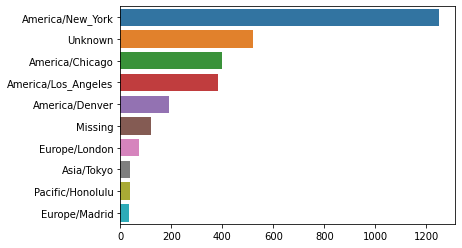

In [39]:
# 가로 막대 그래프
sns.barplot(x=top10_tz.values, y=top10_tz.index)
plt.show()

In [42]:
df_clean['tz'].value_counts().tail(n=10)

Europe/Uzhgorod                   1
America/Santo_Domingo             1
Australia/Queensland              1
America/Argentina/Buenos_Aires    1
Africa/Johannesburg               1
America/Argentina/Cordoba         1
Asia/Kuching                      1
Europe/Skopje                     1
Europe/Volgograd                  1
Asia/Manila                       1
Name: tz, dtype: int64

In [46]:
# 한국 서울 표준 시간대(Asia/Seoul)가 데이터프레임에 등장할까요?
# df_clean[df_clean.tz == 'Asia/Seoul']
df_clean[df_clean.tz.str.contains('Seoul')]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
1428,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,KR,1.0,Asia/Seoul,11,y7mqmw,w41aUb,rebroth,"en-US,en;q=0.8",1.usa.gov,http://t.co/l16apDbA,http://apod.nasa.gov/apod/ap120314.html,1.331925e+09,1.331739e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3154,Mozilla/5.0 (iPad; U; CPU iPhone OS 5_0_1 like...,KR,0.0,Asia/Seoul,11,wcndER,zkpJBR,bnjacobs,ko-kr,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3175,Mozilla/5.0 (iPad; U; CPU iPhone OS 5_0_1 like...,KR,1.0,Asia/Seoul,11,wcndER,zkpJBR,bnjacobs,ko-kr,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3496,Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...,KR,0.0,Asia/Seoul,11,wQacbF,AsWr9f,addthis,en-us,1.usa.gov,https://twitter.com/whitehouse/status/18067782...,http://www.whitehouse.gov/energy/gasprices#.T2...,1.331927e+09,1.331912e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3506,Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...,KR,0.0,Asia/Seoul,11,wQacbF,AsWr9f,addthis,en-us,1.usa.gov,direct,http://www.whitehouse.gov/energy/gasprices#.T2...,1.331927e+09,1.331912e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN


## 사용자 접속 국가(c) 분석

* 가장 많이 접속한 국가 상위 10개 시각화

In [47]:
df_clean['c'] = df_clean['c'].fillna('Missing')  # NA를 'Missing'으로 대체
df_clean.loc[df_clean.c == '', 'c'] = 'Unknown'  # 빈 문자열('')을 'Unknown'으로 대체

In [51]:
top10_country = df_clean['c'].value_counts().head(n=10)

In [52]:
top10_country

US         2305
Missing     641
GB           74
CA           60
ES           37
JP           37
BR           35
DE           28
IT           27
NL           22
Name: c, dtype: int64

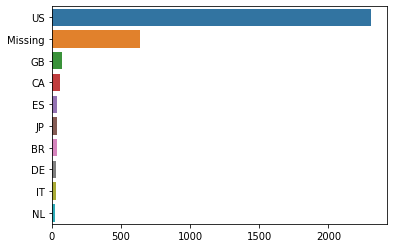

In [53]:
sns.barplot(x=top10_country.values, y=top10_country.index)
plt.show()

In [56]:
# 미국과 NA(Missing)를 제외한 상위 10개 국가
top10_country2 = df_clean['c'].value_counts().iloc[2:12]

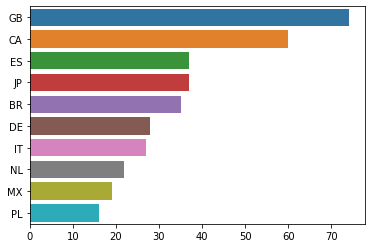

In [57]:
sns.barplot(x=top10_country2.values, y=top10_country2.index)
plt.show()